- Load the dataset into a Pandas DataFrame.
- Display the first few rows.
- Get an overview of the dataset (columns, data types, missing values, etc.).

In [40]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load the dataset
file_path = 'taxi_trajectories/train.csv'  
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [10]:
# filter missing data
df = df[df['MISSING_DATA'] == False]

df.shape

(1710660, 10)

In [11]:

# Get basic info about the dataset
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1710660 entries, 0 to 1710669
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   TRIP_ID       int64  
 2   CALL_TYPE     object 
 3   ORIGIN_CALL   float64
 4   ORIGIN_STAND  float64
 5   TAXI_ID       int64  
 6   TIMESTAMP     int64  
 7   DAY_TYPE      object 
 8   MISSING_DATA  bool   
 9   POLYLINE      object 
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 132.1+ MB


In [12]:
# Polyline cleanup

# Convert POLYLINE from string to list
df['POLYLINE'] = df['POLYLINE'].apply(ast.literal_eval)

# POLYLINE should contain at least two GPS points for valid trajectories.
# Filter rows with less than 2 GPS points
df = df[df['POLYLINE'].apply(len) > 1]

In [14]:
# Check for other missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Unnamed: 0            0
TRIP_ID               0
CALL_TYPE             0
ORIGIN_CALL     1311436
ORIGIN_STAND     876466
TAXI_ID               0
TIMESTAMP             0
DAY_TYPE              0
MISSING_DATA          0
POLYLINE              0
dtype: int64

- Drop `Unnamed: 0` (unnecessary index columns).  
- `ORIGIN_CALL` and `ORIGIN_STAND` have significant missing values but thats fine as they not used for our model predictions
- `POLYLINE` is an object but contains lists (keep as is).  
- Convert `TIMESTAMP` to datetime for better analysis.  


In [16]:
# Drop unnecessary index columns
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert TIMESTAMP to datetime format
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s')

# Display the updated dataset info
print("\nUpdated Dataset Info:")
df.info()


Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1674152 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   TRIP_ID       1674152 non-null  int64         
 1   CALL_TYPE     1674152 non-null  object        
 2   ORIGIN_CALL   362716 non-null   float64       
 3   ORIGIN_STAND  797686 non-null   float64       
 4   TAXI_ID       1674152 non-null  int64         
 5   TIMESTAMP     1674152 non-null  datetime64[ns]
 6   DAY_TYPE      1674152 non-null  object        
 7   MISSING_DATA  1674152 non-null  bool          
 8   POLYLINE      1674152 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 116.6+ MB


- `ORIGIN_CALL` (~78% missing) -> Drop it.  
- `ORIGIN_STAND` (~52% missing) -> Fill NaNs with `0` (assuming it means no stand).  



In [18]:
# Drop ORIGIN_CALL column due to excessive missing values
df.drop(columns=['ORIGIN_CALL'], inplace=True)

# Fill ORIGIN_STAND NaN values with 0
df['ORIGIN_STAND'].fillna(0, inplace=True)

# Verify changes
print("\nUpdated Missing Values Count:")
df.isnull().sum()




/var/folders/mv/1l8hsgqn1gg1ysw_5rvfsz7c0000gp/T/ipykernel_99446/1700559561.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ORIGIN_STAND'].fillna(0, inplace=True)



Updated Missing Values Count:


TRIP_ID         0
CALL_TYPE       0
ORIGIN_STAND    0
TAXI_ID         0
TIMESTAMP       0
DAY_TYPE        0
MISSING_DATA    0
POLYLINE        0
dtype: int64

In [19]:
# Display dataset info after modifications
print("\nDataset Info After Handling Missing Values:")
df.info()


Dataset Info After Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
Index: 1674152 entries, 0 to 1710669
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   TRIP_ID       1674152 non-null  int64         
 1   CALL_TYPE     1674152 non-null  object        
 2   ORIGIN_STAND  1674152 non-null  float64       
 3   TAXI_ID       1674152 non-null  int64         
 4   TIMESTAMP     1674152 non-null  datetime64[ns]
 5   DAY_TYPE      1674152 non-null  object        
 6   MISSING_DATA  1674152 non-null  bool          
 7   POLYLINE      1674152 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 103.8+ MB


- Extract `hour`, `day of the week`, and `month` from `TIMESTAMP` for trend analysis.  
- Plot trip frequency by hour to identify peak demand times.  


/var/folders/mv/1l8hsgqn1gg1ysw_5rvfsz7c0000gp/T/ipykernel_99446/4199309074.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")


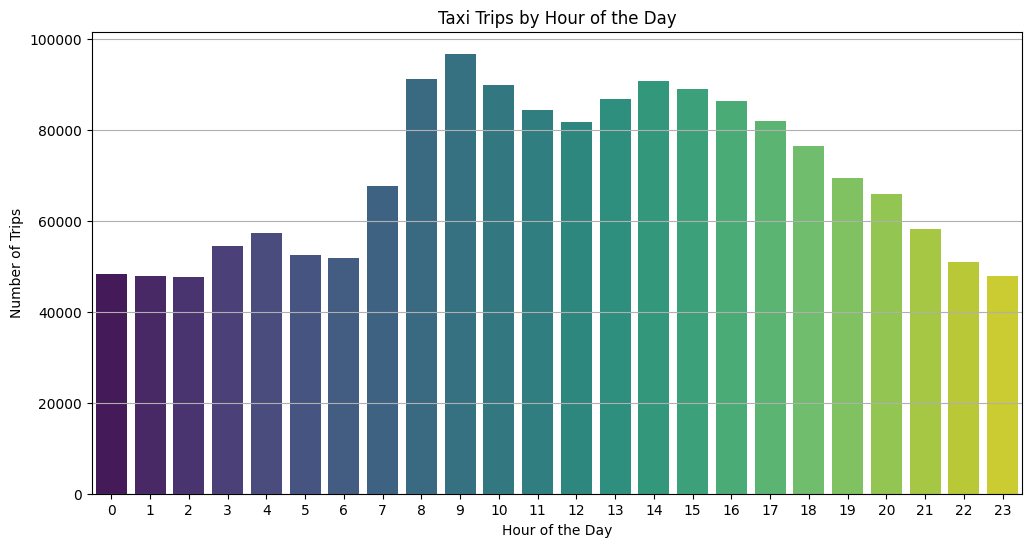

In [22]:
# Extract date-related features
df['HOUR'] = df['TIMESTAMP'].dt.hour
df['DAY_OF_WEEK'] = df['TIMESTAMP'].dt.dayofweek  # Monday = 0, Sunday = 6
df['MONTH'] = df['TIMESTAMP'].dt.month

# Count trips per hour
hourly_trips = df['HOUR'].value_counts().sort_index()

# Plot trip frequency by hour
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Taxi Trips by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


- **Morning & Evening Peaks:**  
  - Surge in trips from **8-10 AM** (morning commute).  
  - Another peak from **4-6 PM** (evening rush).  

- **Nighttime Drop:**  
  - Significant decline after **9 PM**, staying low until early morning.  

- **Steady Midday Usage:**  
  - Consistent trip volume between **10 AM - 4 PM**.  

- Next: Analyze trip patterns across weekdays vs. weekends.  

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_6192\1093820536.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_labels, y=day_of_week_trips.values, palette="viridis")


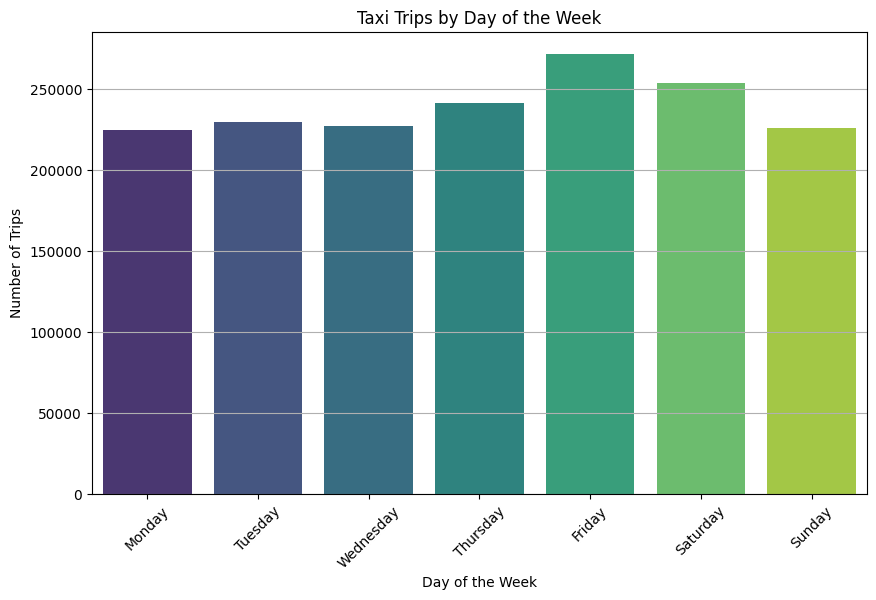

In [52]:
# Count trips by day of the week
day_of_week_trips = df['DAY_OF_WEEK'].value_counts().sort_index()

# Day mapping for better labels
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_labels = [day_mapping[day] for day in day_of_week_trips.index]

# Plot trip frequency by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_labels, y=day_of_week_trips.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.title("Taxi Trips by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


- Friday and Saturday have the highest demand, likely due to nightlife and weekend activities.  
- Monday to Thursday show steady trip volumes, typical of workweek commutes.  
- Sunday sees a slight drop, may be a rest day for many people, or possibly due to reduced travel demand.  

Next:
- Compute, analyze and plot a histogram of `TRAJECTORY_LENGTH` (number of GPS points in a trip) to observe its distribution.  
- Identify potential outliers or unusual trends.  



In [23]:
# Compute trajectory lengths
df['TRAJECTORY_LENGTH'] = df['POLYLINE'].apply(len)


In [24]:
# Compute basic statistics
average_length = df['TRAJECTORY_LENGTH'].mean()
max_length = df['TRAJECTORY_LENGTH'].max()
min_length = df['TRAJECTORY_LENGTH'].min()
median_length = df['TRAJECTORY_LENGTH'].median()

print(f"Average Trajectory Length: {average_length}")
print(f"Maximum Trajectory Length: {max_length}")
print(f"Minimum Trajectory Length: {min_length}")
print(f"Median Trajectory Length: {median_length}")

Average Trajectory Length: 49.80301071826214
Maximum Trajectory Length: 3881
Minimum Trajectory Length: 2
Median Trajectory Length: 42.0


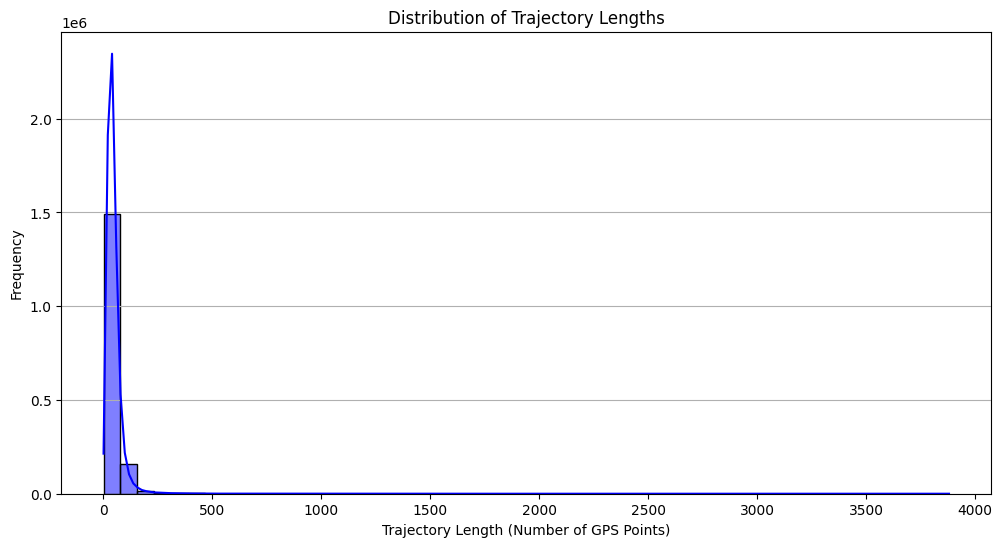

In [25]:
# Plot the distribution of TRAJECTORY_LENGTH
plt.figure(figsize=(12, 6))
sns.histplot(df['TRAJECTORY_LENGTH'], bins=50, kde=True, color="blue")
plt.xlabel("Trajectory Length (Number of GPS Points)")
plt.ylabel("Frequency")
plt.title("Distribution of Trajectory Lengths")
plt.grid(axis='y')
plt.show()


- Most trips are short, with a high frequency under **100 GPS points**.  
- A long tail exists, indicating some long-distance trips.  
- Potential outliers: trips above **300 GPS points** may be long-distance or erroneous.  
- Typical trip lengths fall between **20-100 GPS points**.  


Next:
- Get summary stats for `TRAJECTORY_LENGTH` to see typical trip lengths.  
- Use the IQR method to spot and summarize any unusually long trips.  


In [30]:
# Compute descriptive statistics
trajectory_stats = df['TRAJECTORY_LENGTH'].describe()
print("\nTrajectory Length Statistics:")
print(trajectory_stats)

# Define IQR for outlier detection
Q1 = trajectory_stats['25%']
Q3 = trajectory_stats['75%']
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier Thresholds: Lower = {lower_bound}, Upper = {upper_bound}")

# Count outliers
outliers = df[(df['TRAJECTORY_LENGTH'] < lower_bound) | (df['TRAJECTORY_LENGTH'] > upper_bound)]
print(f"\nNumber of Outliers: {len(outliers)}")

# Display sample of outliers
print("\nSample Outliers:")
outliers.head()



Trajectory Length Statistics:
count    1.674152e+06
mean     4.980301e+01
std      4.558953e+01
min      2.000000e+00
25%      2.900000e+01
50%      4.200000e+01
75%      5.900000e+01
max      3.881000e+03
Name: TRAJECTORY_LENGTH, dtype: float64

Outlier Thresholds: Lower = -16.0, Upper = 104.0

Number of Outliers: 81116

Sample Outliers:


,TRIP_ID,CALL_TYPE,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,HOUR,DAY_OF_WEEK,MONTH,TRAJECTORY_LENGTH
45,1372639536620000570,A,0.0,20000570,2013-07-01 00:45:36,A,False,"[[-8.663409, 41.180724], [-8.665209, 41.18112]...",0,0,7,145
73,1372638303620000112,A,0.0,20000112,2013-07-01 00:25:03,A,False,"[[-8.587116, 41.162427], [-8.586198, 41.162112...",0,0,7,116
86,1372637754620000007,C,0.0,20000007,2013-07-01 00:15:54,A,False,"[[-8.645373, 41.008275], [-8.645427, 41.00886]...",0,0,7,105
93,1372644253620000574,C,0.0,20000574,2013-07-01 02:04:13,A,False,"[[-8.640792, 41.149026], [-8.640126, 41.146227...",2,0,7,141
102,1372638616620000672,C,0.0,20000672,2013-07-01 00:30:16,A,False,"[[-8.67411, 41.153868], [-8.674119, 41.153841]...",0,0,7,112


- **Outlier Thresholds:** Anything above **104 GPS points** is an outlier (no lower outliers).  
- **Outlier Count:** **81116** (~4.84% of the data) exceed this threshold.  
- **Nature of Outliers:** These are extra-long trips, but some might be data errors.  

We have two options:
- **Option 1: Cap Lengths** -> Keep all data but limit extreme values.  
- **Option 2: Remove Outliers** -> Get a cleaner dataset, reducing noise.  

Went with: Remove Outliers  
- **Better Model Accuracy:** Prevents extreme trips from skewing predictions.  
- **Cleaner Data:** Focuses on typical taxi trips, improving reliability.  
- **Easier Analysis:** Makes trends clearer and models simpler to train.  

Next Steps  
- Drop all trips where `TRAJECTORY_LENGTH` is over **104 GPS points**.  



In [33]:
# Remove outliers
cleaned_df = df[df['TRAJECTORY_LENGTH'] <= 104]

# Check the shape of the dataset after removal
print(f"Original Dataset Size: {df.shape[0]}")
print(f"Cleaned Dataset Size: {cleaned_df.shape[0]}")
print(f"Number of Rows Removed: {df.shape[0] - cleaned_df.shape[0]}")

# Display descriptive statistics of TRAJECTORY_LENGTH after removal
print("\nTrajectory Length Statistics (After Outlier Removal):")
print(cleaned_df['TRAJECTORY_LENGTH'].describe())


Original Dataset Size: 1674152
Cleaned Dataset Size: 1593036
Number of Rows Removed: 81116

Trajectory Length Statistics (After Outlier Removal):
count    1.593036e+06
mean     4.348283e+01
std      2.060735e+01
min      2.000000e+00
25%      2.800000e+01
50%      4.100000e+01
75%      5.600000e+01
max      1.040000e+02
Name: TRAJECTORY_LENGTH, dtype: float64


- **Dataset Reduction:** Now **1,593,036 rows**.  
- **Updated Stats:**  
  - Mean trajectory length: **43.48 GPS points** (was 48.88).  
  - Standard deviation: **20.61** (less spread out).  
  - Max length: **104 GPS points** (the set cap).  



- Convert `CALL_TYPE` and `DAY_TYPE` into numbers for modeling.  
 


In [34]:
cleaned_df = cleaned_df.copy()

# Encode categorical variables
cleaned_df['CALL_TYPE'] = cleaned_df['CALL_TYPE'].astype('category').cat.codes
cleaned_df['DAY_TYPE'] = cleaned_df['DAY_TYPE'].astype('category').cat.codes


# Display the prepared dataset info
print("\nPrepared Dataset Info:")
print(cleaned_df.info())

# Display a sample of the prepared dataset
print("\nSample Rows:")
cleaned_df.head()



Prepared Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1593036 entries, 0 to 1710669
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   TRIP_ID            1593036 non-null  int64         
 1   CALL_TYPE          1593036 non-null  int8          
 2   ORIGIN_STAND       1593036 non-null  float64       
 3   TAXI_ID            1593036 non-null  int64         
 4   TIMESTAMP          1593036 non-null  datetime64[ns]
 5   DAY_TYPE           1593036 non-null  int8          
 6   MISSING_DATA       1593036 non-null  bool          
 7   POLYLINE           1593036 non-null  object        
 8   HOUR               1593036 non-null  int32         
 9   DAY_OF_WEEK        1593036 non-null  int32         
 10  MONTH              1593036 non-null  int32         
 11  TRAJECTORY_LENGTH  1593036 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(3), int64(3), in

,TRIP_ID,CALL_TYPE,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,HOUR,DAY_OF_WEEK,MONTH,TRAJECTORY_LENGTH
0,1372636858620000589,2,0.0,20000589,2013-07-01 00:00:58,0,False,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",0,0,7,23
1,1372637303620000596,1,7.0,20000596,2013-07-01 00:08:23,0,False,"[[-8.639847, 41.159826], [-8.640351, 41.159871...",0,0,7,19
2,1372636951620000320,2,0.0,20000320,2013-07-01 00:02:31,0,False,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",0,0,7,65
3,1372636854620000520,2,0.0,20000520,2013-07-01 00:00:54,0,False,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",0,0,7,43
4,1372637091620000337,2,0.0,20000337,2013-07-01 00:04:51,0,False,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",0,0,7,29


In [35]:
# Encode DAY_OF_WEEK into numeric values
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
               'Friday': 4, 'Saturday': 5, 'Sunday': 6}
cleaned_df['DAY_OF_WEEK'] = cleaned_df['DAY_OF_WEEK'].map(day_mapping)

# drop MISSING_Data 
model_df = cleaned_df.drop(columns=['MISSING_DATA'])

# Display updated dataset info
print("\nUpdated Dataset Info:")
print(model_df.info())

# Display a sample of the finalized dataset
print("\nSample Rows:")
model_df.head()



Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1593036 entries, 0 to 1710669
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   TRIP_ID            1593036 non-null  int64         
 1   CALL_TYPE          1593036 non-null  int8          
 2   ORIGIN_STAND       1593036 non-null  float64       
 3   TAXI_ID            1593036 non-null  int64         
 4   TIMESTAMP          1593036 non-null  datetime64[ns]
 5   DAY_TYPE           1593036 non-null  int8          
 6   POLYLINE           1593036 non-null  object        
 7   HOUR               1593036 non-null  int32         
 8   DAY_OF_WEEK        0 non-null        float64       
 9   MONTH              1593036 non-null  int32         
 10  TRAJECTORY_LENGTH  1593036 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), int8(2), object(1)
memory usage: 112.4+ MB
None

Sample Rows:


,TRIP_ID,CALL_TYPE,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,POLYLINE,HOUR,DAY_OF_WEEK,MONTH,TRAJECTORY_LENGTH
0,1372636858620000589,2,0.0,20000589,2013-07-01 00:00:58,0,"[[-8.618643, 41.141412], [-8.618499, 41.141376...",0,NaN,7,23
1,1372637303620000596,1,7.0,20000596,2013-07-01 00:08:23,0,"[[-8.639847, 41.159826], [-8.640351, 41.159871...",0,NaN,7,19
2,1372636951620000320,2,0.0,20000320,2013-07-01 00:02:31,0,"[[-8.612964, 41.140359], [-8.613378, 41.14035]...",0,NaN,7,65
3,1372636854620000520,2,0.0,20000520,2013-07-01 00:00:54,0,"[[-8.574678, 41.151951], [-8.574705, 41.151942...",0,NaN,7,43
4,1372637091620000337,2,0.0,20000337,2013-07-01 00:04:51,0,"[[-8.645994, 41.18049], [-8.645949, 41.180517]...",0,NaN,7,29


In [37]:
# Save the original cleaned dataset to a CSV file
model_df.to_csv('taxi_trajectories/cleaned_taxi_data.csv', index=False)

# Confirm the file was saved
print("\nCleaned dataset saved as 'cleaned_taxi_data.csv'.")



Cleaned dataset saved as 'cleaned_taxi_data.csv'.
